In [2]:
import cv2
import numpy as np
import os
from IPython.display import Image, display
import matplotlib.pyplot as plt

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 

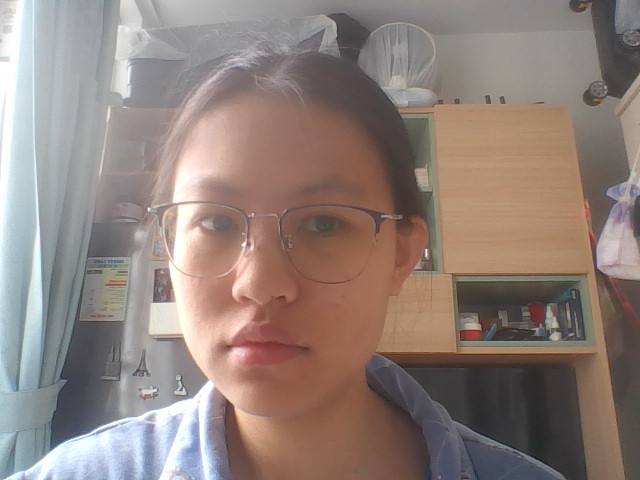

In [4]:
# Task 1
# declare a video capture object
vid = cv2.VideoCapture(0)

captured_frame = None 

while True:
    # Capture the video frame by frame
    ret, frame_raw = vid.read()
    if not ret:
        break

    frame = cv2.flip(frame_raw, 1)
    print(frame.shape) 


    # Display the resulting frame
    cv2.imshow('COMP4423 A1', frame)

    if captured_frame is not None:
        cv2.imshow('Task 1: Captured Image', captured_frame)

    key = cv2.waitKey(1) & 0xFF

    #-------------------Press 'q' to quit------------------------
    if key == ord('q'):
        break

    # ------------------Press 'c' to capture image------------------
    if key == ord('c') and captured_frame is None:
        captured_frame = frame.copy()
        cv2.imwrite('captured_image.png', captured_frame)
        print('Image captured.')

# release the cap object
vid.release()
cv2.destroyAllWindows()

# display the captured image
if os.path.exists('captured_image.png'):
    display(Image('captured_image.png'))


(100, 100)


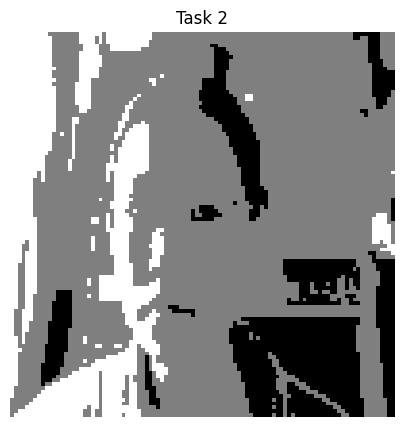

In [5]:
# Task 2
# load the captured image
captured_frame = cv2.imread('captured_image.png')

# 1. the generated image should be no more than 100x100
img_size = (100, 100)
img_resized = cv2.resize(captured_frame, img_size, interpolation=cv2.INTER_AREA)

# 2. convert the image to grayscale
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

# 3. three colors in the bricks (e.g., white, gray, black)
img_color = np.zeros_like(img_gray)
# black
img_color[img_gray <= 85] = 0 
# gray
img_color[(img_gray > 85) & (img_gray <= 170)] = 127
# white
img_color[img_gray > 170] = 255    
'''
# improve: upscale for display so it doesn't look tiny
scale = 6  # 100x100 -> 600x600
img_lego_display = cv2.resize(
    img_color,
    (img_size[0]*scale, img_size[1]*scale),
    interpolation=cv2.INTER_NEAREST
)
'''

# show results
print(img_color.shape) 

cv2.imshow('Task 2: LEGO Image (100x100, 3 colors)', img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

# display
plt.figure(figsize=(5, 5))
plt.imshow(img_color, cmap='gray', vmin=0, vmax=255)
plt.title('Task 2')
plt.axis('off')
plt.show()

Grid size: 100x100
Total bricks: 2929
Brick counts (height x width):
  1x1: 394
  1x2: 249
  1x4: 78
  2x1: 1536
  2x2: 175
  2x4: 39
  4x2: 327
  4x4: 131


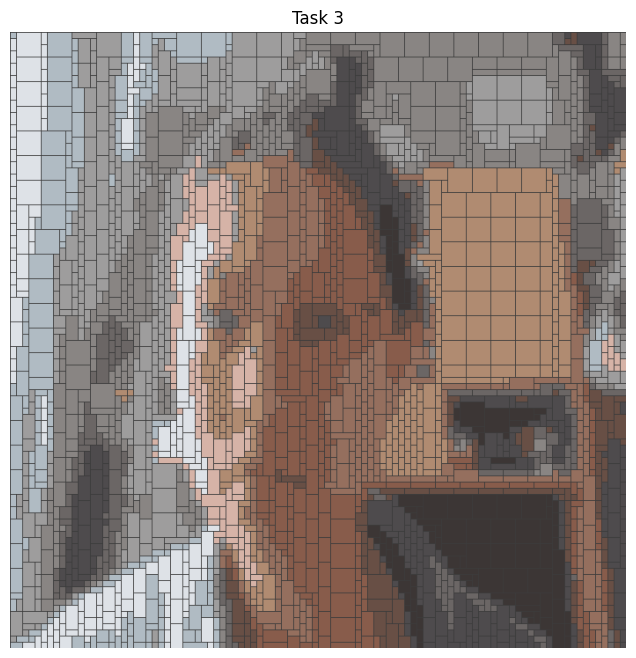

In [ ]:
# Task 3

h,w,_ = img_resized.shape
print(f"Grid size: {h}x{w}")

# 1. add more colors
# let k as number of colors
K = 12
img_blur = cv2.GaussianBlur(img_resized, (3, 3), 0)
Z = img_blur.reshape((-1, 3)).astype(np.float32)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

_, labels, centers = cv2.kmeans(Z, K, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.reshape((h, w))

# 2. brick size, largest first
brick_types = [
    (4, 4),
    (4, 2),
    (2, 4),
    (2, 2),
    (1, 4),
    (1, 2),
    (2, 1),
    (1, 1),
]

used = np.zeros((h, w), dtype=bool)
bricks = []     
brick_counts = {}

for r in range(h):
    for c in range(w):
        if used[r, c]:
            continue

        color_idx = labels[r, c]
        placed = False

        for bh, bw in brick_types:
            if r + bh > h or c + bw > w:
                continue

            region_labels = labels[r:r+bh, c:c+bw]
            region_used = used[r:r+bh, c:c+bw]

            if np.all(region_labels == color_idx) and not np.any(region_used):
                used[r:r+bh, c:c+bw] = True
                bricks.append((r, c, bh, bw, color_idx))
                brick_counts[(bh, bw)] = brick_counts.get((bh, bw), 0) + 1
                placed = True
                break

        if not placed:
            used[r, c] = True
            bricks.append((r, c, 1, 1, color_idx))
            brick_counts[(1, 1)] = brick_counts.get((1, 1), 0) + 1

# 2. render the LEGO image with bricks
stud_px = 8  # pixels per stud
render_h, render_w = h * stud_px, w * stud_px
lego_render = np.zeros((render_h, render_w, 3), dtype=np.uint8)

for r, c, bh, bw, color_idx in bricks:
    color = centers[color_idx].tolist()
    top, left = r * stud_px, c * stud_px
    bottom, right = (r + bh) * stud_px, (c + bw) * stud_px
    # fill brick
    cv2.rectangle(lego_render, (left, top), (right, bottom), color, thickness=-1)
    # border
    border_color = (60, 60, 60) 
    cv2.rectangle(lego_render, (left, top), (right, bottom), border_color, thickness=1)


cv2.imshow('Task 3: LEGO multi-size, multi-color', lego_render)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 3, summary
total_bricks = sum(brick_counts.values())
print("Total bricks:", total_bricks)
print("Brick counts (height x width):")
for (bh, bw), cnt in sorted(brick_counts.items()):
    print(f"  {bh}x{bw}: {cnt}")

# display in notebook output
lego_render_rgb = cv2.cvtColor(lego_render, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(lego_render_rgb)
plt.title('Task 3')
plt.axis('off')
plt.show()


In [ ]:
# Task 4

# generate LEGO style image from a frame
def generate_lego_image(frame, max_size=(100, 100), K=12):
    # resize to 100x100
    img_resized = cv2.resize(frame, max_size, interpolation=cv2.INTER_AREA)
    h, w, _ = img_resized.shape

    # k-means color quantization to K colors
    img_blur = cv2.GaussianBlur(img_resized, (3, 3), 0)
    Z = img_blur.reshape((-1, 3)).astype(np.float32)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(Z, K, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    labels = labels.reshape((h, w))

    # greedy tiling with different brick sizes
    brick_types = [
    (4, 4),
    (4, 2),
    (2, 4),
    (2, 2),
    (1, 4),
    (1, 2),
    (2, 1),
    (1, 1),
]

    used = np.zeros((h, w), dtype=bool)
    bricks = []

    for r in range(h):
        for c in range(w):
            if used[r, c]:
                continue

            color_idx = labels[r, c]
            placed = False

            for bh, bw in brick_types:
                if r + bh > h or c + bw > w:
                    continue

                region_labels = labels[r:r+bh, c:c+bw]
                region_used = used[r:r+bh, c:c+bw]

                if np.all(region_labels == color_idx) and not np.any(region_used):
                    used[r:r+bh, c:c+bw] = True
                    bricks.append((r, c, bh, bw, color_idx))
                    placed = True
                    break

            if not placed:
                used[r, c] = True
                bricks.append((r, c, 1, 1, color_idx))

    # render LEGO-style image
    stud_px = 6  
    render_h, render_w = h * stud_px, w * stud_px
    lego_render = np.zeros((render_h, render_w, 3), dtype=np.uint8)

    for r, c, bh, bw, color_idx in bricks:
        color = centers[color_idx].tolist()
        top, left = r * stud_px, c * stud_px
        bottom, right = (r + bh) * stud_px, (c + bw) * stud_px
        cv2.rectangle(lego_render, (left, top), (right, bottom), color, thickness=-1)
        border_color = (60, 60, 60)
        cv2.rectangle(lego_render, (left, top), (right, bottom), border_color, thickness=1)

    return lego_render


# real time
vid = cv2.VideoCapture(0)

lego_window_open = False

print("Press 'b' to generate LEGO-style image from current frame.")
print("Press 'q' to quit.")

while True:
    ret, frame_raw = vid.read()
    if not ret:
        break

    frame = cv2.flip(frame_raw, 1)  
    cv2.imshow('Task 4: Live Camera (Original)', frame)

    key = cv2.waitKey(1) & 0xFF

    if key == ord('q'):
        break

    # ------------------------Press 'b' to generate and display LEGO-style image--------------------------
    if key == ord('b'):
        lego_img = generate_lego_image(frame)
        cv2.imshow('Task 4', lego_img)
        lego_window_open = True

vid.release()
cv2.destroyAllWindows()


Press 'b' to generate LEGO-style image from current frame.
Press 'q' to quit.
